In [3]:
import tensorflow.keras as keras

In [8]:
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, LeakyReLU, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

In [11]:
from tensorflow.keras.datasets import mnist

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 22s 2us/step


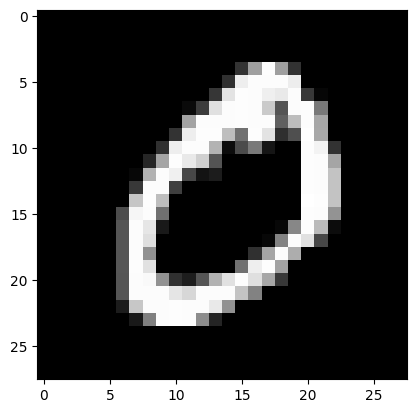

In [18]:
plt.imshow(x_train[1],cmap="gray")
plt.show()

In [19]:
Latent_size = 32

In [20]:
encoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512),
    LeakyReLU(),
    Dropout(0.5),
    Dense(256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(),
    Dropout(0.5),
    Dense(64),
    LeakyReLU(),
    Dropout(0.5),
    Dense(Latent_size),
    LeakyReLU()
])

In [21]:
decoder = Sequential([
    Dense(64, input_shape = (Latent_size, )),
    LeakyReLU(),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(),
    Dropout(0.5),
    Dense(256),
    LeakyReLU(),
    Dropout(0.5),
    Dense(512),
    LeakyReLU(),
    Dropout(0.5),
    Dense(784),
    Activation('sigmoid'),
    Reshape((28,28))
])

In [22]:
img = Input(shape = (28,28))

In [23]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [24]:
model = Model(inputs = img, outputs = output)
model.compile('nadam', loss='binary_crossentropy', metrics=['accuracy'])

1/1 [==============================] - 0s 8ms/step


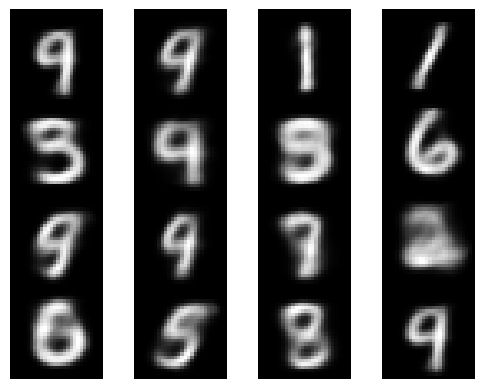

----------- EPOCH 59 -----------
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1912 - accuracy: 0.1534


In [25]:
EPOCHS = 60

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)